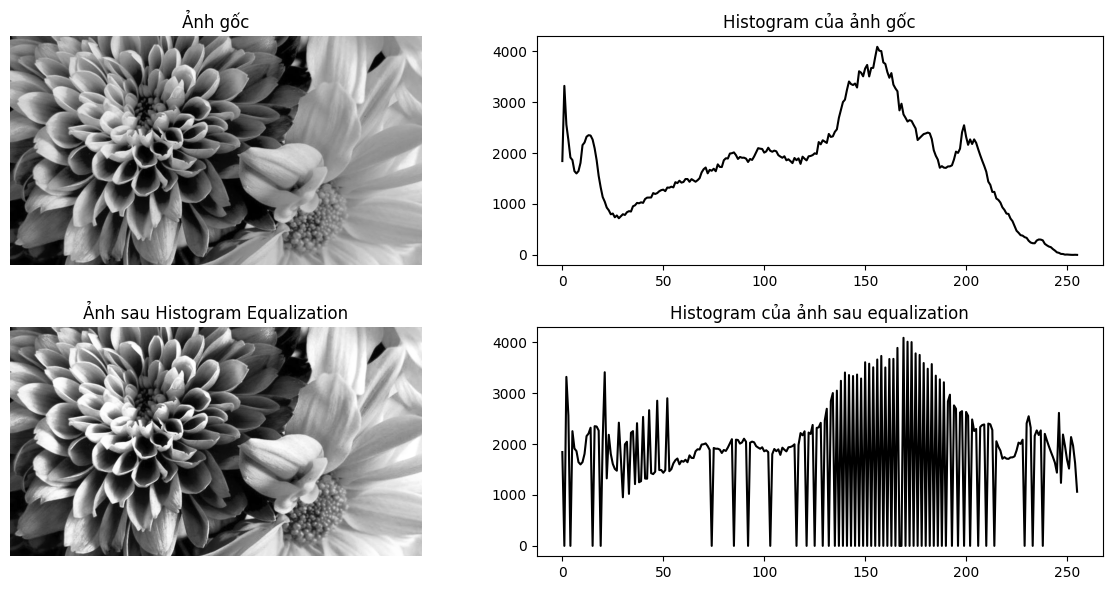

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
img = cv2.imread('pic1.jpg', 0)  # Đọc ảnh ở chế độ grayscale

# Tính histogram của ảnh gốc
hist_orig, bins = np.histogram(img.flatten(), 256, [0,256])

# Thực hiện histogram equalization
img_equalized = cv2.equalizeHist(img)

# Tính histogram của ảnh sau khi equalization
hist_eq, bins = np.histogram(img_equalized.flatten(), 256, [0,256])

# Hiển thị ảnh gốc và ảnh sau khi equalization
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_orig, color='black')
plt.title('Histogram của ảnh gốc')

plt.subplot(2, 2, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title('Ảnh sau Histogram Equalization')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_eq, color='black')
plt.title('Histogram của ảnh sau equalization')

plt.tight_layout()
plt.show()


Thay đổi kích thước

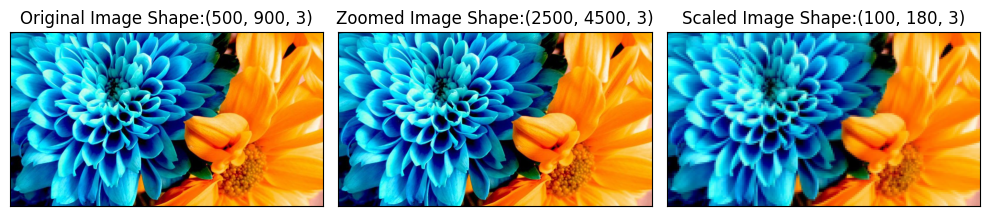

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic1.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Do matplotlib sử dụng định dạng màu RGB (Red, Green, Blue).

scale_factor_1 = 5.0  

scale_factor_2 = 1/5.0

# Get the original image dimensions
height, width = image_rgb.shape[:2]

# Calculate the new image dimensions
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

# Resize the image
zoomed_image = cv2.resize(src =image_rgb, 
                          dsize=(new_width, new_height), 
                          interpolation=cv2.INTER_LANCZOS4) #Nội suy Lanczos với cửa sổ 8x8, chất lượng cao hơn cv2.INTER_CUBIC (nội suy bậc 3), cv2.INTER_LINEAR (nội suy tuyến tính), cv2.INTER_NEAREST (nội suy gần nhất)

# Calculate the new image dimensions
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)

# Scaled image
scaled_image = cv2.resize(src= image_rgb, 
                          dsize =(new_width1, new_height1), 
                          interpolation=cv2.INTER_AREA) #Nội suy vùng

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))

# Plot the Zoomed Image
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))

# Plot the Scaled Image
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


Xoay ảnh

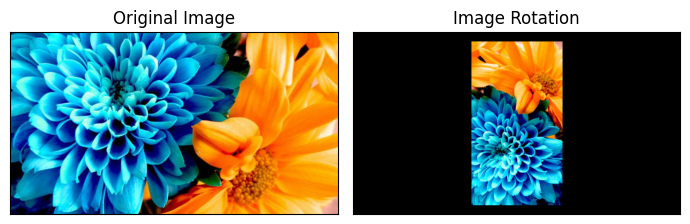

In [13]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = cv2.imread('pic1.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2) #Tọa độ tâm, tính bằng cách chia chiều rộng và chiều cao của hình ảnh cho 2
angle = 90
scale = 0.5

# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


Dịch chuyển ảnh

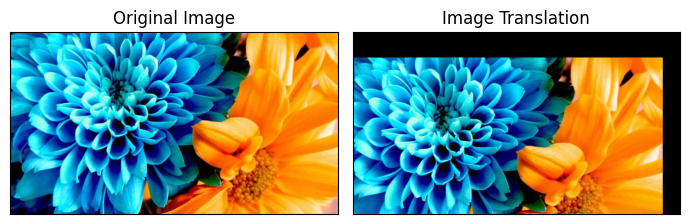

In [15]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = cv2.imread('pic1.jpg')
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

tx = -50 #khoảng dịch chuyển theo trục x (pixel).
ty = 70 #khoảng dịch chuyển theo trục y (pixel).

# Translation matrix
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32) #Giá trị 1 ở đường chéo chính đại diện cho việc giữ nguyên các giá trị của trục x và trục y
# warpAffine does appropriate shifting given the Translation matrix.
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the transalted image
axs[1].imshow(translated_image)
axs[1].set_title('Image Translation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


Cắt ảnh

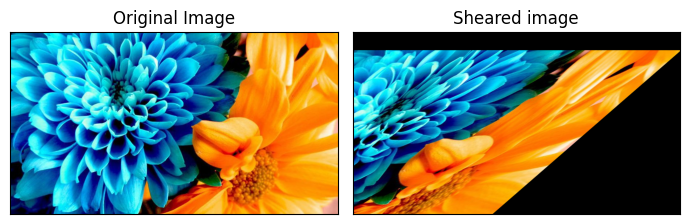

In [25]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('pic1.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image shape along X and Y
width = image_rgb.shape[1]
height = image_rgb.shape[0]

# Define the Shearing factor
shearX = -1.15
shearY = 50

# Define the Transformation matrix for shearing
transformation_matrix = np.array([[1, shearX, 0], 
                                  [0, 1, shearY]], dtype=np.float32)                                
# Apply shearing
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Sheared image
axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


[[0.01960784 0.04313725 0.04705882 ... 0.99215686 0.99215686 0.99215686]
 [0.00784314 0.01176471 0.00392157 ... 1.         0.99607843 0.99607843]
 [0.01568627 0.00784314 0.         ... 1.         1.         1.        ]
 ...
 [0.00784314 0.00392157 0.00392157 ... 0.87058824 0.88235294 0.88627451]
 [0.00784314 0.00784314 0.00784314 ... 0.87058824 0.87843137 0.88235294]
 [0.00784314 0.00784314 0.00784314 ... 0.86666667 0.8745098  0.87843137]]


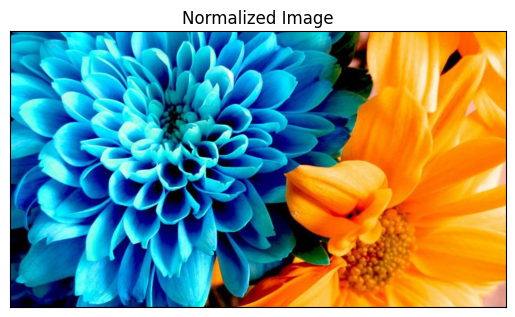

In [5]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('pic1.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into channels
b, g, r = cv2.split(image_rgb)

# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

# Normalize each channel
b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
# Normalized image
print(normalized_image[:,:,0])

plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()


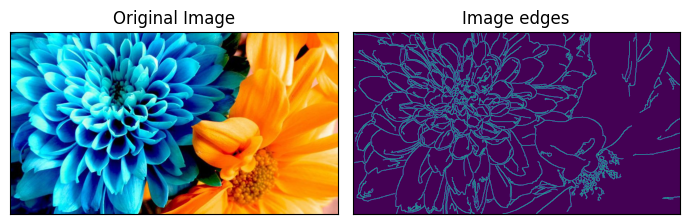

In [6]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read image from disk.
img = cv2.imread('pic1.jpg')
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection
edges = cv2.Canny(image= image_rgb, threshold1=0, threshold2=300)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


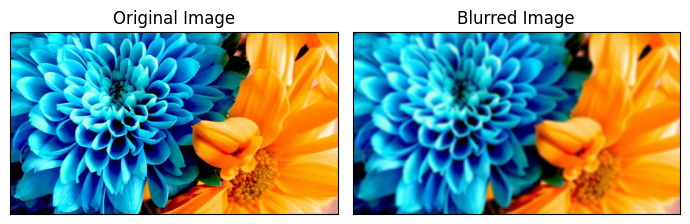

In [7]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('pic1.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(image, (9, 9), 9)

# Convert blurred image to RGB
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(blurred_rgb)
axs[1].set_title('Blurred Image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


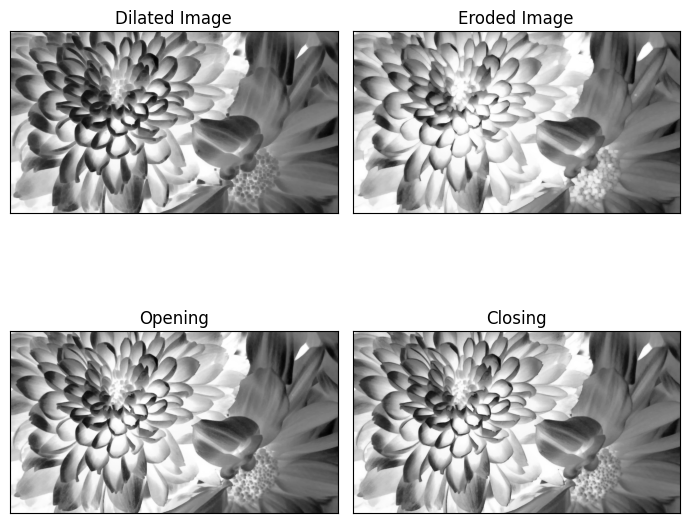

In [8]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('pic1.jpg')

# Convert BGR image to gray
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a structuring element
kernel = np.ones((3, 3), np.uint8)

# Perform dilation
dilated = cv2.dilate(image_gray, kernel, iterations=2)

# Perform erosion
eroded = cv2.erode(image_gray, kernel, iterations=2)

# Perform opening (erosion followed by dilation)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)

# Perform closing (dilation followed by erosion)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Plot the Dilated Image
axs[0,0].imshow(dilated, cmap='Greys')
axs[0,0].set_title('Dilated Image')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

# Plot the Eroded Image
axs[0,1].imshow(eroded, cmap='Greys')
axs[0,1].set_title('Eroded Image')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

# Plot the opening (erosion followed by dilation)
axs[1,0].imshow(opening, cmap='Greys')
axs[1,0].set_title('Opening')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

# Plot the closing (dilation followed by erosion)
axs[1,1].imshow(closing, cmap='Greys')
axs[1,1].set_title('Closing')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()
